In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import pearsonr, shapiro

In [2]:
# Create dataframe fro weather data
df = pd.read_csv('weather.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [3]:
# Encode Description column
df_dummies = pd.get_dummies(df, drop_first=True)

# Shuffle data
df_shuffled = shuffle(df_dummies)

# Split into features and targets
x_values = df_shuffled.drop('Temperature_c', axis=1)
y_values = df_shuffled['Temperature_c']

# Split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values,
                                                    test_size=0.33)

## Do single linear regression

In [4]:
# Create linear regression model
lr_model = LinearRegression()

# Fit model to training data (use humidity as single feature)
lr_model.fit(x_train[['Humidity']], y_train)

LinearRegression()

In [5]:
# Create prediction data
predictions = lr_model.predict(x_test[['Humidity']])

# Compute error metrics
metric_df = pd.DataFrame({'Metric': ['MAE', 
                                     'MSE',
                                     'RMSE',
                                     'R-Squared'
                                    ],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)
                                   ]
                         }).round(3)

metric_df

,Metric,Value
0,MAE,6.023
1,MSE,55.955
2,RMSE,7.480
3,R-Squared,0.380


## Do multi linear regression

In [6]:
# Create new Linear Regression model
lr_model = LinearRegression()

# Fit model using all features
lr_model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Generate predictions using test data
predictions = lr_model.predict(x_test)

[]

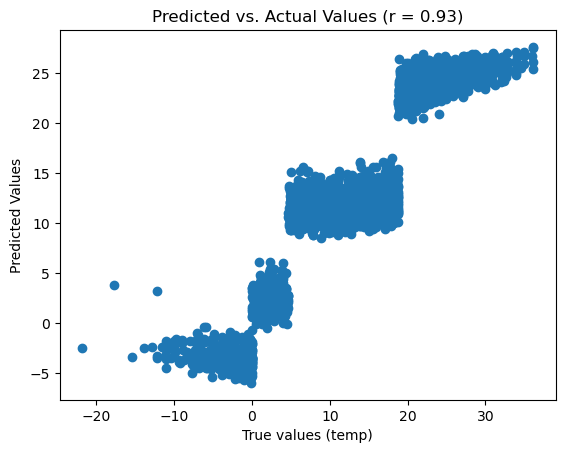

In [8]:
# Plot predictions vs actual test data
plt.scatter(y_test, predictions)
plt.xlabel('True values (temp)')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs. Actual Values '
          f'(r = {pearsonr(y_test, predictions)[0]:0.2f})')
plt.plot()

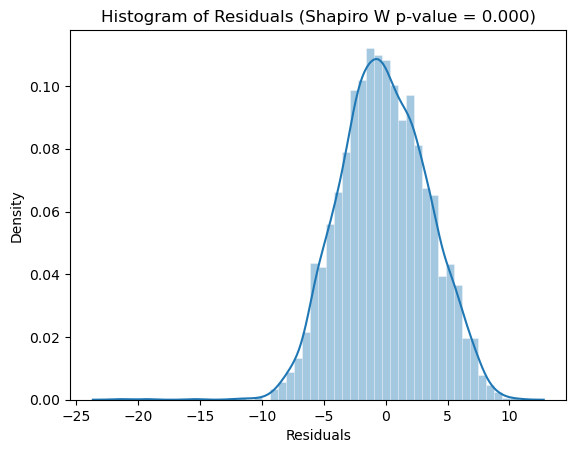

In [9]:
# Plot density of residuals
sns.histplot((y_test - predictions),
             kde=True,
             stat='density',
             kde_kws=dict(cut=3),
             alpha=0.4,
             edgecolor=(1, 1, 1, 0.4),
             bins=50
            )
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals' 
         + ' (Shapiro W p-value = '
         + f'{shapiro(y_test - predictions)[1]:0.3f})')
plt.show()

In [10]:
# Calculate error metrics
multi_metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                     'MSE',
                                     'RMSE',
                                     'R-Squared'
                                    ],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)
                                   ]
                         }).round(3)

multi_metrics_df

,Metric,Value
0,MAE,2.842
1,MSE,12.386
2,RMSE,3.519
3,R-Squared,0.863


Residuals are still skewed, however there is a much stronger linear correlation between predicted and actual values.